# Assignment 6 - Harris Corner Detection

Prepared by: Yu Feng, Chuan Chen, Yi Zhang (Chair of Cartography and Visual Analytics, TUM)

Contact: y.feng@tum.de, chuan.chen@tum.de

### Dependencies 
Please run the following block first if you have installed the necessary dependencies.

In [ ]:
!pip install numpy
!pip install opencv-contrib-python-headless==4.7.0.68
!pip install matplotlib
!pip install scikit-image

### Import the 3rd party libraries

In [1]:
# Numpy offers comprehensive mathematical functions in Python
import numpy as np

# OpenCV provides a optimized tools for Computer Vision.
import cv2 as cv

# Matplotlib is a library for creating visualizations in Python.
from matplotlib import pyplot as plt

Corner detection is a fundamental operation in computer vision and image processing, and it is used to identify points in an image where the brightness or intensity changes abruptly. Corners are important features in image analysis because they provide useful information about the shape and structure of objects in an image.

The `Harris Corner Detection algorithm` is a widely used method for corner detection that was introduced by Chris Harris and Mike Stephens in 1988. The algorithm uses a mathematical formula to compute a "corner response" function for each pixel in an image, which measures the likelihood of the pixel being a corner.

Throughout this homework, you will learn how to implement the `Harris Corner Detection` algorithm, and you will apply it to real-world images to detect corners and `extract features`. 

By completing this homework, you will gain a solid understanding of how to use Python and OpenCV for image processing and computer vision tasks, and you will have the skills to apply the Harris Corner Detection algorithm to a variety of practical applications. Let's get started!

### Task 1: OpenCV version of Harris Corner Detection
OpenCV has the function `cv.cornerHarris()` for this purpose. Its arguments are:

- img - Input image. It should be grayscale and float32 type.
- blockSize - It is the size of neighbourhood considered for corner detection
- ksize - Aperture parameter of the Sobel derivative used.
- k - Harris detector free parameter in the equation.

Steps:
1. load the image from `"example/img.jpg"`, convert its channel into RGB
2. get the grayscale image
3. use harris corner detector to get corner response, blocksize = 2, kernel size = 3, Harris detector free parameter k = 0.02
4. get the coordinates of corner with reponse larger than 0.05 of the maximum response
5. draw the corner on a copy of the loaded image, using `cv.circle()`

Variables:
1. `src_img` : RGB source image
2. `gray` : grayscale image
3. `corner_response` : result of harris corner detector
4. `corners` : corner points coordinates, which is an 2 element tuple, first element is the y coordinates and the second element is the x coordinates
```
([y1,y2,...,yn],[x1,x2,...,xn])
```
5. `result image` : presentation of corners (step 5)

Hints:
1. Function [cv.cornerHarris](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345) to implement harris corner detection
2. Function [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to get coordinates of points which fit the condition.

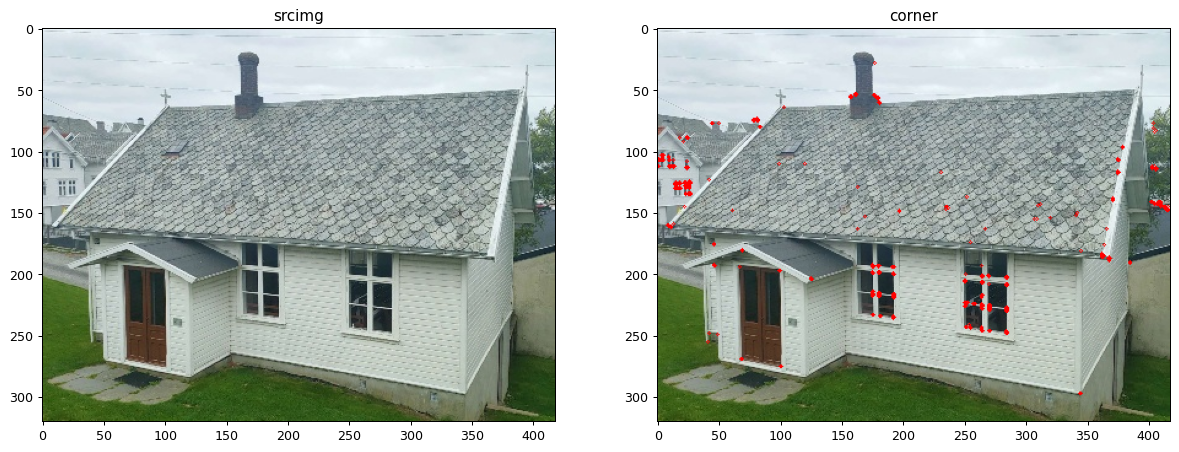

In [2]:
### BEGIN SOLUTION

### END SOLUTION
# display
plt.figure(figsize=(16, 8), dpi=91)
ax1 = plt.subplot(1,2,1)
plt.imshow(src_img)
plt.title("srcimg")
plt.subplot(1,2,2)
plt.imshow(result_img)
plt.title("corner")
plt.show()


In [3]:
def public_test1():
    try:
        corner_response
    except NameError:
        print("[Error] Variable corner_response is not defined.")
        return False

    try:
        corners
    except NameError:
        print("[Error] Variable corners is not defined.")
        return False
    
    try:
        len(corners) == 2
    except:
        print("[Error] The tuple corners should only have 2 elements.")
        return False
    return True

assert public_test1()



### Task 2: Sobel Operator
The Sobel operator is a popular edge detection algorithm used in computer vision and image processing. It calculates the gradient of the image intensity at each pixel location in the x and y direction and then combines them to produce an edge map.

Steps:
1. (See hint 1) calculate the gradient of `gray`, kernel size = 3

Variables:
1. `dx` : gradient in x direction
2. `dy` : gradient in y direction

Hints:
1. Function [cv.Sobel](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d) to calculates the image derivatives using an extended Sobel operator.

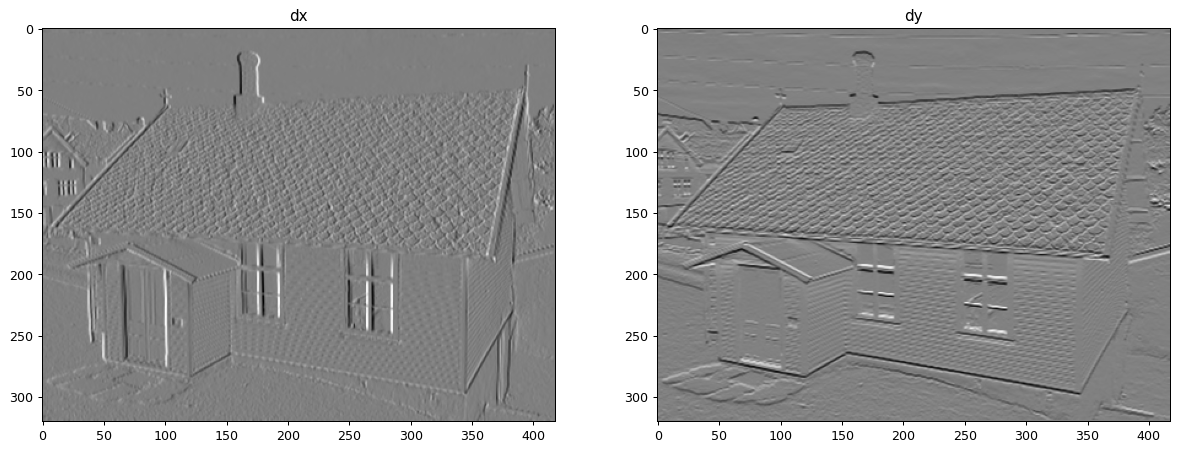

In [4]:
### BEGIN SOLUTION

### END SOLUTION
# display
plt.figure(figsize=(16, 8), dpi=91)
ax1 = plt.subplot(1,2,1)
plt.imshow(dx,cmap='gray')
plt.title("dx")
plt.subplot(1,2,2)
plt.imshow(dy,cmap='gray')
plt.title("dy")
plt.show()

In [5]:
def public_test2():
    try:
        dx
    except NameError:
        print("[Error] Variable dx is not defined.")
        return False

    try:
        dy
    except NameError:
        print("[Error] Variable dy is not defined.")
        return False
    return True

assert public_test2()



### Task 3: Harris Matrix
The Harris matrix is a 2x2 matrix that is calculated for each pixel in the image. It is defined as:
$$
\begin{equation*}
    \begin{aligned}
        M & = \left[
            \begin{array}{cc}
                \sum_S{d_x^2} & \sum_S{d_x d_y} \\
                \sum_S{d_x d_y} & \sum_S{d_y^2}
            \end{array}
        \right]
    \end{aligned}
\end{equation*}
$$
where $S$ is a blockSize × blockSize neighborhood.

Steps:
1. (See Hint 1) get the eigenvalues of the Harris Matrix of `gray`, blocksize = 2, kernel size = 3

Variables:
1. `lambda1` : matrix of first eigenvalue
2. `lambda2` : matrix of second eigenvalue


Hints:
1. Function [cv.cornerEigenValsAndVecs](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga4055896d9ef77dd3cacf2c5f60e13f1c) to calculate eigenvalues and eigenvectors of image blocks for corner detection.

In [6]:
### BEGIN SOLUTION

### END SOLUTION

In [7]:
def public_test3():
    try:
        lambda1
    except NameError:
        print("[Error] Variable lambda1 is not defined.")
        return False

    try:
        lambda2
    except NameError:
        print("[Error] Variable lambda2 is not defined.")
        return False
    return True

assert public_test3()



### Task 4: Corner response function
The corner response function is define in the form:
$$
\begin{equation*}
    \begin{aligned}
        H = det(M) - k (trace(M))^2
    \end{aligned}
\end{equation*}
$$
where k is the Harris detector free parameter. It can also be written in the form
$$
\begin{equation*}
    \begin{aligned}
        H = (1-2k)\lambda_1\lambda_2 - k (\lambda_1^2 + \lambda_2^2)
    \end{aligned}
\end{equation*}
$$

Steps:
1. calculate the corner response H using k = 0.02

Variables:
1. `H` : corner response

Hints:
1. Function [cv.cornerHarris]() to implement harris corner detection

In [8]:
### BEGIN SOLUTION

### END SOLUTION

In [9]:
def public_test4():
    try:
        H
    except NameError:
        print("[Error] Variable H is not defined.")
        return False

    return True

assert public_test4()



### Integration
Now you can use what you got from the previous tasks to detect corner on your own. You can compare your result with the OpenCV one. (This part won't be tested)

Variables:
1. `result_img2` : your own result image

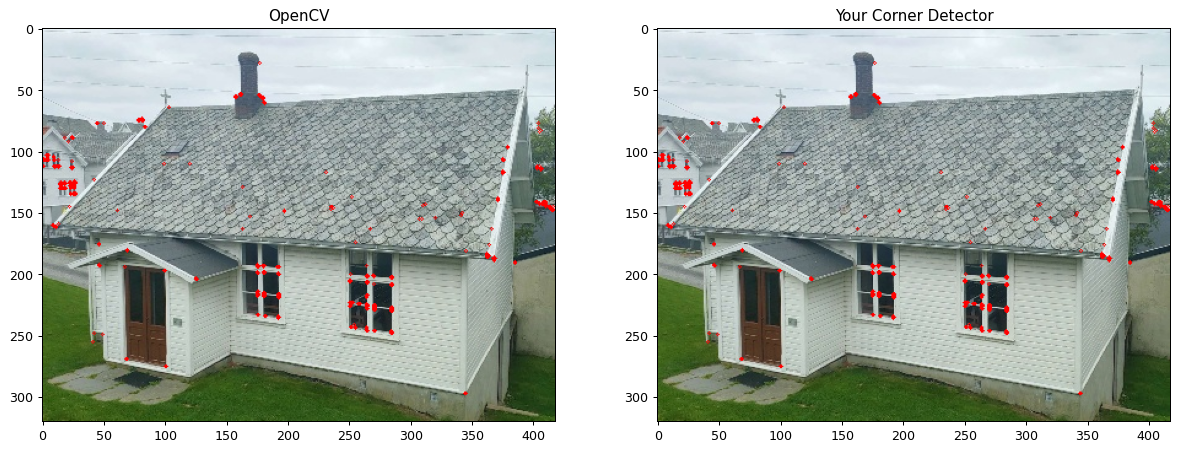

In [10]:
### BEGIN SOLUTION

### END SOLUTION
# display
plt.figure(figsize=(16, 8), dpi=91)
ax1 = plt.subplot(1,2,1)
plt.imshow(result_img)
plt.title("OpenCV")
plt.subplot(1,2,2)
plt.imshow(result_img2)
plt.title("Your Corner Detector")
plt.show()